# Intorduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end to end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Predvidjamo target da li je 1 ili 0

# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Cerate y (labels)
y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
# clf je model

# We will keep the defauld hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
clf.fit(X_train,y_train);

In [6]:
# make a prediction
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2


In [7]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3


In [8]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [9]:
y_test

65     1
159    1
232    0
269    0
222    0
      ..
68     1
29     1
259    0
300    0
200    0
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training data and test data

clf.score(X_train, y_train) # kakav je score kod treniranja

1.0

In [11]:
clf.score(X_test, y_test)

0.8688524590163934

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.86      0.91      0.89        35

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 3, 32]], dtype=int64)

In [14]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [15]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%") # .2f je precica za formatiranje stringa
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%
 
Trying model with 20 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 30 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 40 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 50 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 60 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 70 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 80 estimators...
Model accuracy on test set: 80.33%
 
Trying model with 90 estimators...
Model accuracy on test set: 83.61%
 


In [16]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

In [18]:
import warnings
warnings.filterwarnings("ignore") # Na ovaj nacic se ignorisu warnings ali to bas i nije najbolje 
#za uraditi 

In [19]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.6 (default, Jul 30 2021, 11:42:22) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\User\Desktop\sample_project_1_on_PC\env\python.exe
   machine: Windows-10-10.0.19043-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.2
        numpy: 1.20.2
        scipy: 1.6.2
       Cython: None
       pandas: 1.2.4
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.2.0

Built with OpenMP: True


In [20]:
# Da bi imao odredjenu verziju scikit learn-a treba da imam i odredjene verzije numpy-ja pythona i 
# tako dalje

In [21]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels (usually 'X' & 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# Split the data into trainig and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test je 20% od data

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure its all numerical

In [27]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
len(car_sales)

1000

In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [30]:
# Split the data  inro X/y

X = car_sales.drop("Price", axis=1)
y = car_sales.Price

# Split into training and test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [31]:
# Build machine learning model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categoris into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # Stavljamo i doors zato sto imaju 
#3 kategorije, kola sa 3 vrata, sa 4 i sa 5.
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")# ostatak kolona koje pronadjes propusti ne menjaj ih

transformed_X = transformer.fit_transform(X)
transformed_X

In [32]:
pd.DataFrame(transformed_X)

NameError: name 'transformed_X' is not defined

Gore u tabeli sad ima vise kolona, to je zato sto prve 3,4 kolone su marka automobila, 0 je bmw, 1 je honda, 2 je audi, onda idu boje, koliko raylicitih boja toliko ima i kolona i na kraju isto se radi i sa vratima


In [33]:
dummies = pd.get_dummies(car_sales[["Make",'Colour','Doors']])

In [34]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


Isto kao i prethodno samo preko pandas, s tim da ovo ne radi za kola


In [35]:
# Lets refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model.fit(X_train, y_train)

NameError: name 'transformed_X' is not defined

In [36]:
model.score(X_test,y_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [37]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


### 1.2 Wha if there were missing values

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.


In [38]:
# Import car sales missing data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [39]:
car_sales_missing.isna().sum() # Proverava koliko ima praznih kolona i sumira ih

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
# Create X & y

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [41]:
# Lets try and convert our data to numbers

# Turn the categoris into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # Stavljamo i doors zato sto imaju 
#3 kategorije, kola sa 3 vrata, sa 4 i sa 5.
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")# ostatak kolona koje pronadjes propusti ne menjaj ih

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

Ne radi zato sto imamo kolona koje su Nan tj prazne

In [42]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill missing data with pandas

In [43]:
car_sales_missing.Doors.value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [44]:
# Fill the Make column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the Colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the Doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [45]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [46]:
# Remove rows with missing price value

car_sales_missing.dropna(inplace=True)

In [47]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [48]:
len(car_sales_missing)

950

In [49]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [50]:
# Lets try and convert our data to numbers

# Turn the categoris into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # Stavljamo i doors zato sto imaju 
#3 kategorije, kola sa 3 vrata, sa 4 i sa 5.
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")# ostatak kolona koje pronadjes propusti ne menjaj ih

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-learn

Split your data first (into train/test), always keep your training & test data separate

Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

Don't use data from the future (test set) to fill data from the past (training set)

In [51]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [54]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [56]:
# Check missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

Let's fill the missing values. We'll fill the training and test values separately to ensure training data stays with the training data and test data stays with the test data.

Note: We use fit_transform() on the training data and transform() on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [57]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(X_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [58]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [60]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [61]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [62]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

Prvo treba razmisliti o kakvom se problemu radi.

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

Step 1 - Check the Scikit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

![](https://scikit-learn.org/stable/_static/ml_map.png)

### 2.1 Picking a machine learning model for a regression problem

In [63]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [64]:
boston_df = pd.DataFrame(boston["data"], columns=boston['feature_names'])
boston_df["target"] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


[Objasnjenje za dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

In [65]:
# How many samples?
len(boston_df)

506

In [66]:
# Lets try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data

X = boston_df.drop("target", axis=1)
y = boston_df.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168519

How do we improve this score?

What if Ridge want working?

Lets refer to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [67]:
# Lets try Random Forest Regresion
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

In [68]:
# Check the Ridge model again
model.score(X_test, y_test)

0.6662221670168519

Decision three je nesto kao mnogo if else blokova koji su sami izgenerisani na osnovu data

### 2.2 Choosing and estimator for a classification problem

Lets go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [69]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
len(heart_disease)

303

Constulting the map it says to try 'LinearSVC'

In [71]:
# Import the LinearSVC  estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make data
X = heart_disease.drop("target", axis = 1)
y = heart_disease.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test,y_test)

0.8688524590163934

In [72]:
heart_disease["target"].value_countsunts()

AttributeError: 'Series' object has no attribute 'value_countsunts'

In [73]:
# Import the Random forest classifier  estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make data
X = heart_disease.drop("target", axis = 1)
y = heart_disease.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test,y_test)

0.8524590163934426

Tidbit:
   * If you have structured data, use ensemble methods
   * If you have unstructured data, use deep learning or transfer learning

In [74]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Differend names for:

1. x = feature, features variables, data
2. y = labels, targets, targets variables

In [75]:
# Import the Random forest classifier  estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make data
X = heart_disease.drop("target", axis = 1)
y = heart_disease.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = RandomForestClassifier()

# Fit the model to the data (trainging the machine learning model)
clf.fit(X_train, y_train)

#Evaluate the LinearSVC (use the paterns the model has learned)
clf.score(X_test,y_test)

0.8524590163934426

In [76]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [77]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [78]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

Random Forest model deep dive
These resources will help you understand what's happening inside the Random Forest models we've been using:
 * [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
 * [Random Forest Wikipedia](https://simple.wikipedia.org/wiki/Random_forest) (simple version)
 * [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
 * [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### 3.2 Make predictions using a machine learning model

2 ways to make predictios:
1. predict()
2. predict_proba()

In [79]:
# Use a trained model to make a predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesnt work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [80]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [81]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [82]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [83]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [84]:
# Compare predictions to truth labels to evaluate the model
# Accuracy

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [85]:
clf.score(X_test, y_test)

0.8524590163934426

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()

In [87]:
# predict_proba() returns probabilities of a classification label

# Prvi broj je klasa kada je target 0 pa verovatnoca za to a drugi broj je 1 pa verovatnoca za kad je target 1 
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [88]:
# Lets predict() on the same data
clf.predict(X_test[:5])

# Poklapa se, samo je gore predstavljeno kroz verovatnoce, a ovde je ispisano gde je veca verovatnoca

array([0, 1, 1, 0, 1], dtype=int64)

In [89]:
heart_disease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [90]:
# Prediction with regresion model
# predict() can be also used for regression models

In [91]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

# Make prediction
y_preds = model.predict(X_test)

In [92]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [93]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [94]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator score method
2. The scoring parameter
3. Problem-specific metric functions

### 4.1 Evaluation a model with score method

In [95]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
clf.score(X_train, y_train)

1.0

In [97]:
clf.score(X_test, y_test)

0.8524590163934426

Lets do the same but for regresion

In [98]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [99]:
model.score(X_test, y_test) # Funckija vraca drugaciju stvar u odnosu na klasifikaciju

0.8654448653350507

### 4.2 Evaluating a model using the scoring paramether

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [102]:
clf.score(X_test, y_test)

0.8524590163934426

In [103]:
cross_val_score(clf, X, y, cv=10) # model je istreniran na 5 razlicitih nacina podela trening 
#i test podataka, prvih 20 posto je test, pa drugih 20 posto je test i tako do 
#kraja i na tome izvrsi kasnije i validaciju i zato je izaz niz

# cv je parametar koji kaze koliko ce razlicitih varijacija biti

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [104]:
np.random.seed(42)

# Single trainng and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [105]:
# Default scoring parameter of classifier  = mean acuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# Scoring parameter set to None by defauld
cross_val_score(clf, X, y, cv=5, scoring=None) # scoring parametar moze da se menja

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Accuracy

In [ ]:
heart_disease.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Dieses Classifier Accuracy: {np.mean(cross_val_score) *100:.2f}%")

**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve

Roc curves are a comparison of a models true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
# Create X_test...ect
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

In [ ]:
# Calculate fpr, tpr and treshholds
fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive) # fpr fase positive rate
#tpr true positive rate

In [ ]:
# Check the false positive rates
fpr

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score #auc - aria under curve

roc_auc_score(y_test, y_probs_positive)


In [ ]:
# Plot perfect ROC curve and AUC score
fpr, tpr, tresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [ ]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

**Confusion matrix**

A confusion matrix is a quick way to compare the labels a model predicts and actual labels it was supposed to predict.
In essence, giving you an idea of where yhe moedl is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

In [ ]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=['Predicted Labels'])

# pokazuje nam koliko ima tacnih, to je glavna dijagonala ( 0 0 i 1 1), a sporedna je pogresna 

In [ ]:
23 + 6 + 6 + 26

In [106]:
len(y_preds)

102

In [107]:
# How to instal conda package
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [108]:
# Make our confusion matrix more visual with Seaborns heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

ValueError: Found input variables with inconsistent numbers of samples: [61, 102]

In [ ]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf_mat(conf_mat)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y,);

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

In [ ]:
# Precision - pokazuje proporciju tacnih pogadjanj
# Recal - pokazuje koliko ima tpr
# F1 je mix precision and recall
# Suport broj samplova
# macro avg sluzi kada imamo jako puno na primer 1 u labelu a jako malo 0, onda to znaci
# weighted avg jesto ne znaci puno kada imamo balans u izlazim klasama

In [ ]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

To summarize:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* F1-score is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

Model evelation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute erro (MAE)
3. Mean squared erro (MSE)

**R^2**

Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfecktly predicts a range of numbers it R^2 value would be 1.

In [109]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [110]:
model.score(X_test, y_test)

0.8654448653350507

In [111]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [112]:
y_test.mean()

21.488235294117644

In [113]:
r2_score(y_test, y_test_mean)

0.0

In [114]:
r2_score(y_test, y_test)

1.0

How far of each predictions is?

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [115]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [116]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})

In [117]:
df

,actual values,predicted values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


In [118]:
df["differences"] = df["predicted values"] - df["actual values"]

In [119]:
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean squared error (MSE)**

In [120]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)

In [121]:
mse

9.867437068627442

In [122]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.867437068627442

MSE will always be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

Now you might be thinking, which regression evaluation metric should you use?

* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
    * Pay more attention to MAE: When being \$10,000 off is ***twice*** as bad as being \$5,000 off.
    * Pay more attention to MSE: When being \$10,000 off is ***more than twice*** as bad as being \$5,000 off.

### 4.2.3 Finally using the scoring parameter

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

clf = RandomForestClassifier()



In [124]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [125]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [126]:
np.random.seed(42)


cv_acc = cross_val_score(clf, X, y, scoring='accuracy')


print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [127]:
# Precision
cv_precision = cross_val_score(clf, X, y, scoring='precision')
np.mean(cv_precision)


0.8085601538512754

In [128]:
# Recall

cv_recall = cross_val_score(clf, X, y, cv=5,scoring='recall')
np.mean(cv_recall)

0.8424242424242424

In [129]:
cv_f1 = cross_val_score(clf, X, y, scoring='f1')
np.mean(cv_f1)

0.841476533416832

how about regresion model?

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df.target

model = RandomForestRegressor()

In [131]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [132]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [133]:
np.mean(cv_r2)

0.6243870737930857

In [134]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [135]:
# Mean squared error

cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

In [136]:
np.mean(cv_mse)

-21.12863512415064

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Clasification evaluation functions**

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'P_recision: {precision_score(y_test, y_preds)}')
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
P_recision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [138]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df.target

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we colect more data? (genraly, the more data, the better)
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters:
* Parameters = model finds these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
* By hand
* Randomly with RandomSearchCV   # CV - cross validation
* Exhaustively with GridSearchCV

In [139]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [140]:
clf.get_params() # hyperparameters koji mogu da se menjaju

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperpameters by hand

Koristim 70 posto za trening 15 posto za validaciju tj podesavanje hyperparametara i 15 za test deo

Lets make 3 sets, training, validation and test.

In [141]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust:
    
   * max_depts
   * max_features
   * min_samples_leaf
   * min_samples_split
   * n_estimators

In [154]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparisons on y_true labels vs. y_pred labels
    on a classification.
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F1 score: {f1*100:.2f}%")
    
    return metric_dict
    

In [148]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

# Split into X & y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled.target

# Split the data into train, validation and test sets

train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [149]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [150]:
clf = RandomForestClassifier()

In [151]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [152]:
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22
Precision: 81.48
Recall: 88.00
F1 score: 84.62


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [155]:
np.random.seed(42)

# Create a second classifier with diferent hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 84.00%
Recall: 84.00%
F1 score: 84.00%


In [156]:
clf_3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)

### 5.2 Hyperparameters tuning with RandomizedSearchCV

In [163]:
from sklearn.model_selection import RandomizedSearchCV

# Zapisujem parametre koje zelim da menjam, i stavljam u liste vrednosti koje zelim da isproba
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto","sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# Split into X & y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # koliko procesora zelim da posvetilm modelu

# Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf, 
                           param_distributions=grid,
                           n_iter=10, # number of models to try tj kombinacije iz grid-a koje idu random
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train); # sam pravi validacione podatke, nema potrebe za vece razdvajanje podataka

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samp

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END max_depth=None,

In [164]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [165]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
Precision: 75.76%
Recall: 89.29%
F1 score: 81.97%


### 5.3 Hyperparameter tuning with GridSearchCV

In [166]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [169]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}
   # uzmemo vrednosti oko kojih su vrednosti najbolje   da bi se smanjilo obucavanje        

In [171]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # koliko procesora zelim da posvetilm modelu

# Setup RandomizedSearchCV

gs_clf = GridSearchCV(estimator=clf, 
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train); # sam pravi validacione podatke, nema potrebe za vece razdvajanje podataka

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [172]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [173]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
Precision: 75.76%
Recall: 89.29%
F1 score: 81.97%


Lets compare our different models metrics.

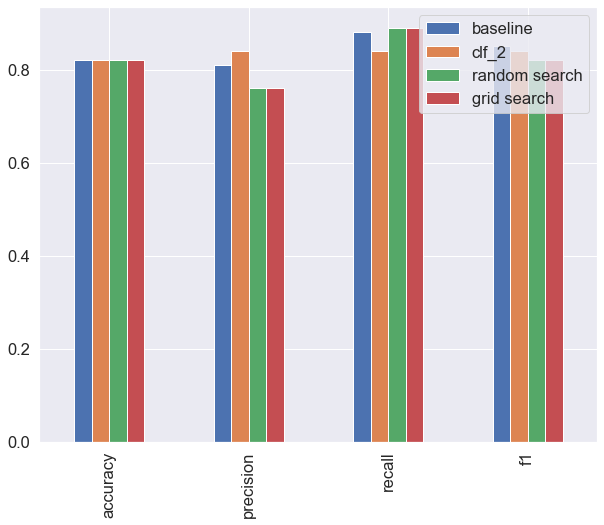

In [175]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

# Comparing the metrics of different Scikit-Learn models

One of the most important things when comparing different models is to make sure they're compared on the same data splits.

For example, let's say you have `model_1` and `model_2` which each differ slightly.

If you want to compare and evaluate their results, `model_1` and `model_2` should both be trained on the same data (e.g. `X_train` and `y_train`) and their predictions should each be made on the same data, for example:
* `model_1.fit(X_train, y_train)` -> `model_1.predict(X_test)` -> `model_1_preds`
* `model_2.fit(X_train, y_train)` -> `model_2.predict(X_test)` -> `model_2_preds`

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

This short notebook compares 3 different models on a small dataset.
1. A baseline `RandomForestClassifier` (all default parameters)
2. A `RandomForestClassifier` tuned with `RandomizedSearchCV` (and `refit=True`)
3. A `RandomForestClassifier` tuned with `GridSearchCV` (and `refit=True`)

The most important part is they all use the same data splits created using `train_test_split()` and `np.random.seed(42)`.

https://colab.research.google.com/drive/1ISey96a5Ag6z2CvVZKVqTKNWRwZbZl0m

Probel mje sto mi nismo na istim podacima radili obuke pa gore kod nije bas skroz validan ali je princip isti

Kada su kolone zajedno uticajne na izlaz, kao na primer kada koristim kolone velicine placa i velicine kuce, gde je obicno kada je velik plac i velika kuca, onda mogu da izbacim kolonu placa na primer jer nece lose uticati na obucavanje modela a ubrzace obucavanje

## 6. Saving and loading a trained machine learinng models

Two ways to save and load machine learing models:
1. With Pythons pickle module
2. With the joblib module

**Pickle**

In [176]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [182]:
# Load a saved model
leaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [183]:
# Make some predicstions

np.random.seed(42)

# Split into X & y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pickle_y_preds = leaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [185]:
from joblib import dump, load

# save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [186]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [187]:
# Make and evaluate joblib predisctions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [188]:
# joblib kada je prevelik moedl je mozda bolji za koristiti

## 7. Putting it all together!

In [190]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [191]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [192]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
   1. Fill missing data
   2. Convert data to numbers
   3. Build a model on the data

In [200]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transfomer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ('door', door_transformer, door_feature),
                        ('num', numeric_transfomer, numeric_features)
                    ])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

Dodatno objasnjenje i gradivo za Pipeline  https://colab.research.google.com/drive/1AX3Llawt0zdjtOxaYuTZX69dhxwinFDi?usp=sharing


Its also possible to use GridSearchCV or RandomizedSearchCV with our Pipeline

In [203]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [204]:
gs_model.score(X_test, y_test)

0.3339554263158365